In [1]:
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, RepeatedKFold,StratifiedKFold, train_test_split
from scipy.stats import randint as sp_randint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [22]:
desc(test)

,dtypes,null_count,total_count,unique_count,missing value ratio,variance of numerics,std,mean,min
Gender,object,0.0,233599.0,2.0,0%,None,None,None,None
Marital_Status,int64,0.0,233599.0,2.0,0%,0.241914,0.491847,1,0
City_Category,object,0.0,233599.0,3.0,0%,None,None,None,None
Stay_In_Current_City_Years,object,0.0,233599.0,5.0,0%,None,None,None,None
Age,object,0.0,233599.0,7.0,0%,None,None,None,None
Product_Category_3,float64,162562.0,71037.0,15.0,0.7%,17.0234,4.12594,18,3
Product_Category_2,float64,72344.0,161255.0,17.0,0.31%,25.9584,5.09494,18,2
Product_Category_1,int64,0.0,233599.0,18.0,0%,13.9605,3.73638,18,1
Occupation,int64,0.0,233599.0,21.0,0%,42.5254,6.52115,20,0
Product_ID,object,0.0,233599.0,3491.0,0%,None,None,None,None


In [23]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [24]:
train.isnull().sum()/train.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [25]:
test.isnull().sum()/test.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

* Train data consists of 550068 observations and 12 features including Target Variable -**Purchase
* Test data consists of 233599 observations and 11 features without Target Variable

### Null Values

* Product_Category_2 consists more than 30%  Null Values
* Product_Category_3 consists alomst 70% of Null Values
** we can definetly drop Product_Category_3 as it contains more null values**
** coming to Product_Category_2 droping it or treating it is purely based on bussiness requirement** as of now we will do EDA and check which is best.

In [26]:
train.User_ID.value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [27]:
train.User_ID.nunique()

5891

* Total no of unique users- **5891**
* most purchases by a single user- 1001680
* we can also extract the top 10 users by no of products orders

In [28]:
train.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00012342       1
P00074542       1
P00083142       1
P00308042       1
P00300742       1
Name: Product_ID, Length: 3631, dtype: int64

In [29]:
train.Product_ID.nunique()

3631

* Total no of unique users- **3631**
* most Purchased Product_ID - P00265242 was purchased 1880 times

 # Univariate Analysis

### Analysing the Target Vaiable

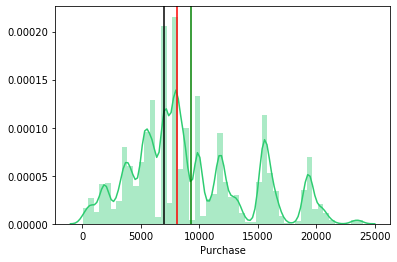

Mean:  9263.968712959126 
Median:  8047.0 
Mode:  7011
skew is: 0.6001400037087128
Kurtosisis: -0.3383775655851702


In [30]:
# Target variable-Purchase
sns.distplot(train['Purchase'],color="#2ecc71")
plt.axvline(train['Purchase'].mean(),color="green")
plt.axvline(train['Purchase'].median(),color="red")
plt.axvline(train['Purchase'].mode()[0],color="black")
plt.show()
print("Mean: ",train['Purchase'].mean(),"\nMedian: ",train['Purchase'].median(),"\nMode: ",train['Purchase'].mode()[0])
print('skew is:', train.Purchase.skew())
print("Kurtosisis:", train.Purchase.kurt())

### Gender

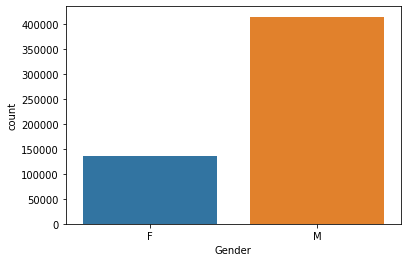

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [31]:
sns.countplot(train.Gender)
plt.show()
train.Gender.value_counts(normalize=True)*100

 * **75% of the users are Male**
 * **25% of the users are Female**

### Age

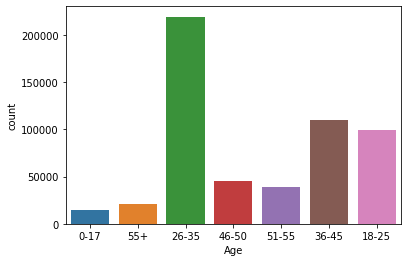

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

In [32]:
sns.countplot(train.Age)
plt.show()
train.Age.value_counts(normalize=True)*100

* **Almost 40% of the users are in age ranging between 26-35**

### Occupation

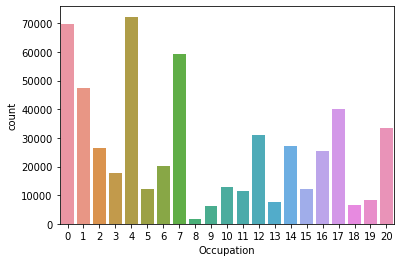

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

In [33]:
sns.countplot(train.Occupation)
plt.show()
train.Occupation.value_counts(normalize=True)*100

* 13% of the users belong to **occupation 4**

### Marital Status

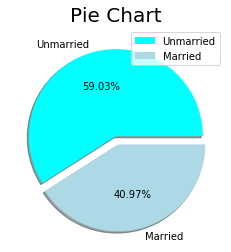

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [34]:
labels = ['Unmarried', 'Married']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]
plt.pie(train.Marital_Status.value_counts(), colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Pie Chart', fontsize = 20)
plt.legend()
plt.show()
train.Marital_Status.value_counts()

* **Almost 41% of the users are Married**

## Product_Category_1 & Product_Category_2 & Product_Category_3

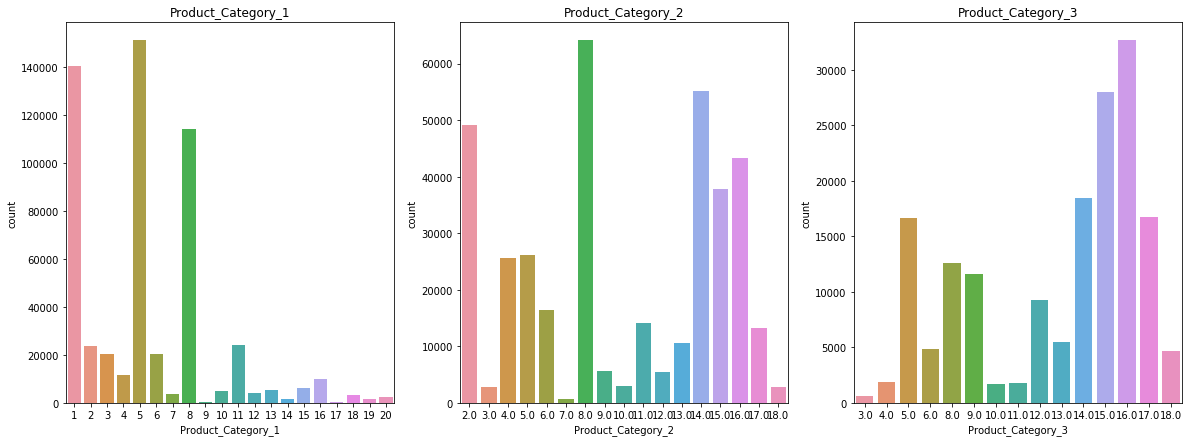

In [35]:
f,ax=plt.subplots(1,3,figsize=(20,7))
sns.countplot("Product_Category_1",data=train,ax=ax[0])
ax[0].set_title('Product_Category_1')
sns.countplot("Product_Category_2",data=train,ax=ax[1])
ax[1].set_title('Product_Category_2')
sns.countplot("Product_Category_3",data=train,ax=ax[2])
ax[2].set_title('Product_Category_3')
plt.show()

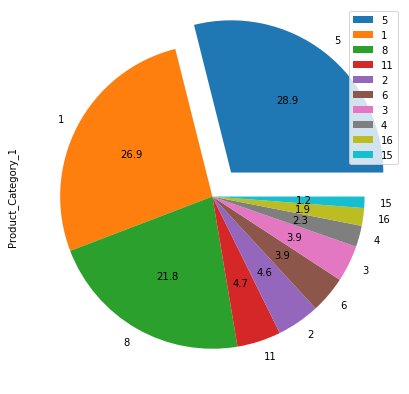

In [36]:
vc=train.Product_Category_1.value_counts()[:10]
vc.plot(kind="pie",figsize=(10,7),explode=[0.2,0,0,0,0,0,0,0,0,0],autopct="%1.1f")
plt.legend()
plt.show()

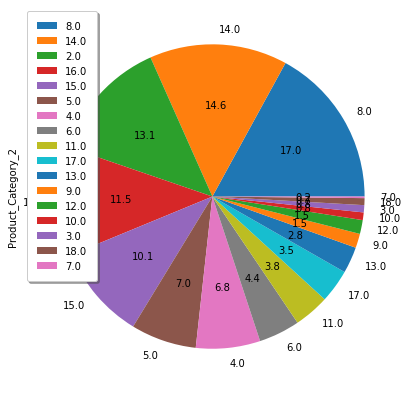

In [37]:
pc2=train.Product_Category_2.value_counts()
pc2.plot(kind="pie",figsize=(10,7),autopct="%1.1f")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

* observation

## City Category

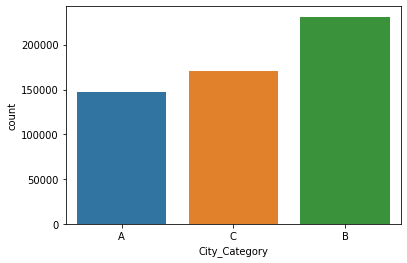

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

In [38]:
sns.countplot(train.City_Category)
plt.show()
train.City_Category.value_counts(normalize=True)*100

**42% of the users belong to City Category B**

## Stay_In_Current_City_Years

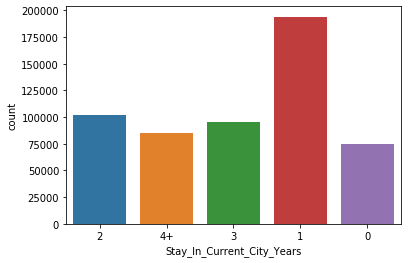

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

In [39]:
sns.countplot(train.Stay_In_Current_City_Years)
plt.show()
train.Stay_In_Current_City_Years.value_counts(normalize=True)*100

**35% of the users have stayed atleast 1 year in their resective cities**

##  Bivariate Analysis

## Gender Vs Purchase

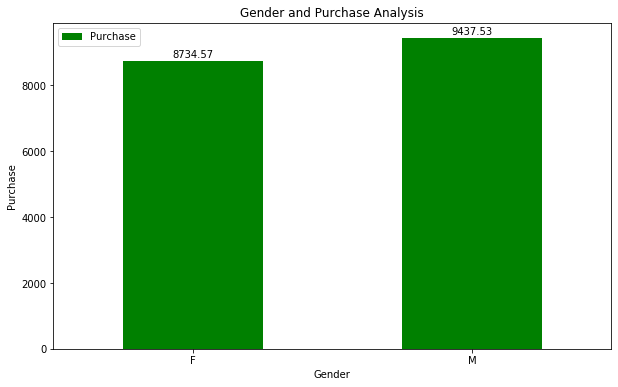

In [40]:
genp=train.pivot_table(index='Gender', values= "Purchase", aggfunc=np.mean)

splot=genp.plot(kind='bar',color="green",figsize=(10,6))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
plt.xticks(rotation=0)
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.show()

* purchase by male is higher when compared with female

## Marital_Status Vs Purchase

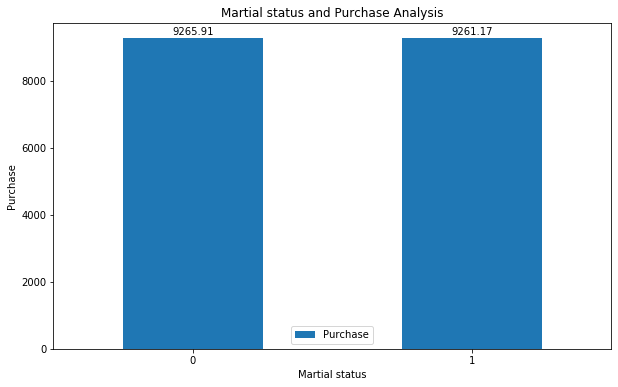

In [41]:
mats=train.pivot_table(index='Marital_Status', values= "Purchase", aggfunc=np.mean)
splot=mats.plot(kind='bar',figsize=(10,6))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
plt.xticks(rotation=0)
plt.xlabel("Martial status")
plt.ylabel("Purchase")
plt.title("Martial status and Purchase Analysis")
plt.show()

* Average purchase made  by married users is almlost same when compared with unmarried users

## City_Category Vs Purchase

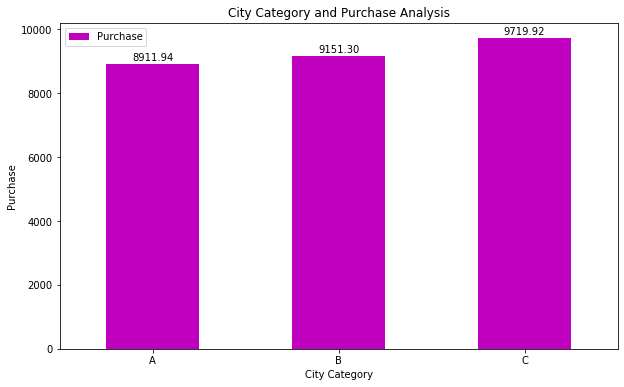

In [42]:
cipur=train.pivot_table(index='City_Category', values= "Purchase", aggfunc=np.mean)
splot=cipur.plot(kind='bar',color="m",figsize=(10,6))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
plt.xticks(rotation=0)
plt.xlabel("City Category")
plt.ylabel("Purchase")
plt.title("City Category and Purchase Analysis")
plt.show()

* ***users from City C have higher average purchases when compared with other cites***

## Stay_In_Current_City_Years vs Purchase

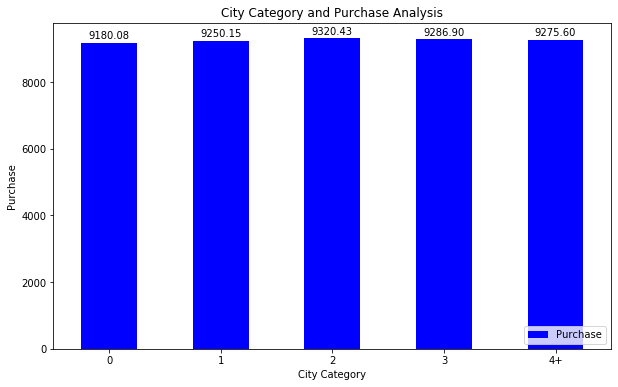

In [43]:
stay=train.pivot_table(index='Stay_In_Current_City_Years', values= "Purchase", aggfunc=np.mean)
splot=stay.plot(kind='bar',color="b",figsize=(10,6))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
plt.xticks(rotation=0)
plt.xlabel("City Category")
plt.ylabel("Purchase")
plt.title("City Category and Purchase Analysis")
plt.legend(loc="lower right")
plt.show()

* **Stay_In_Current_City_Years does not seem to have much influence in purchase** 
* *we can clearly see a uniform distribution in this feature vs Target variable*

## Occupation Vs Purchase

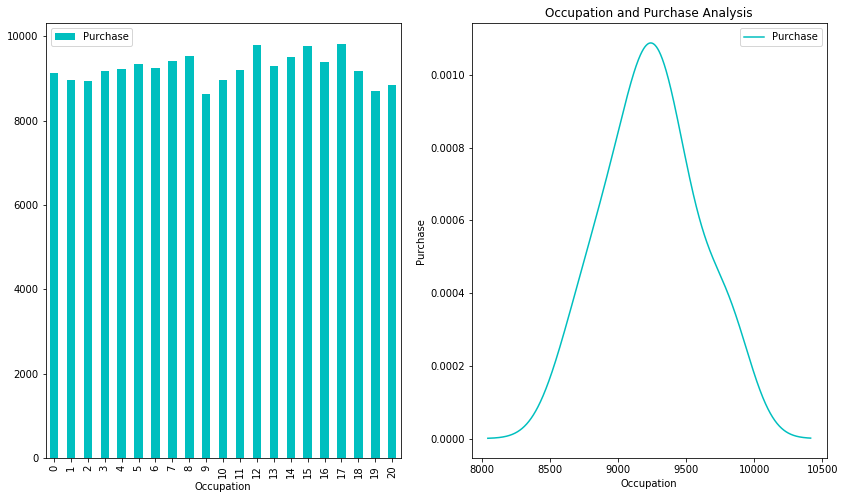

In [44]:
occ=train.pivot_table(index='Occupation', values= "Purchase", aggfunc=np.mean)
f,axes=plt.subplots(1,2,figsize=(18,8))
occ.plot(kind='bar', color='c', figsize=(14,8),ax=axes[0])
occ.plot(kind='kde', color='c', figsize=(14,8),ax=axes[1])
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

* *Occupation does not seem to be a influence on purchases*

## Age Vs Purchase

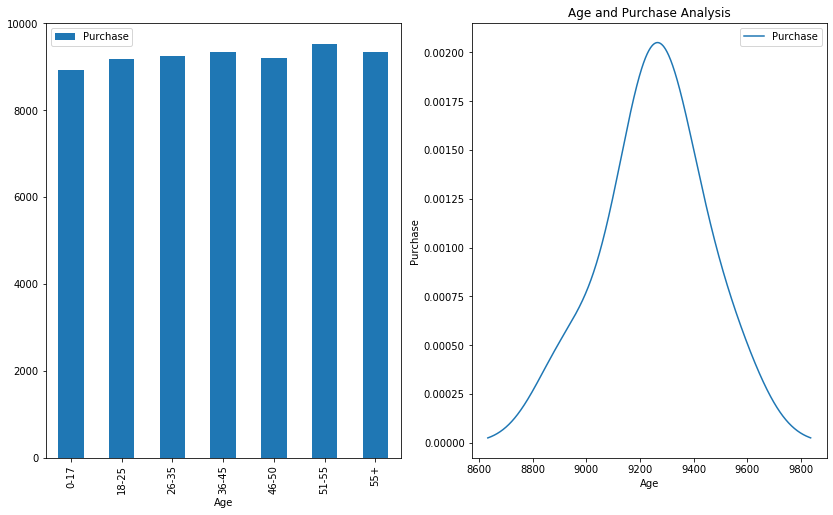

In [45]:
agep=train.pivot_table(index='Age', values= "Purchase", aggfunc=np.mean)
f,axes=plt.subplots(1,2,figsize=(18,8))
agep.plot(kind='bar', figsize=(14,8),ax=axes[0])
agep.plot(kind='kde', figsize=(14,8),ax=axes[1])
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

* Age also does not seems to have any influence on Purchase

## Product_Category_1 Vs Purchase

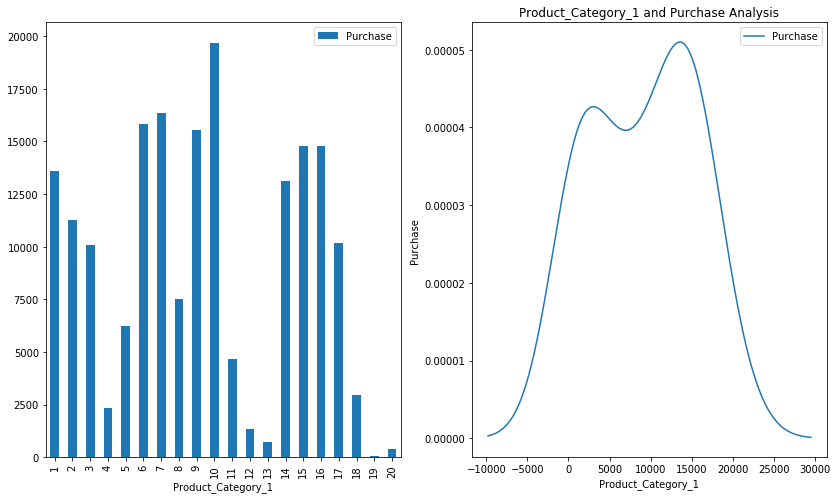

In [7]:
pc1=train.pivot_table(index='Product_Category_1', values= "Purchase", aggfunc=np.mean)
f,axes=plt.subplots(1,2,figsize=(18,8))
pc1.plot(kind='bar', figsize=(14,8),ax=axes[0])
pc1.plot(kind='kde', figsize=(14,8),ax=axes[1])
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

**Product_category_1 seems to be normally disributed**

In [9]:
pc1.describe()

,Purchase
count,20.000000
mean,9071.923526
std,6330.518177
min,37.041797
25%,2812.063113
50%,10133.732625
75%,14769.640735
max,19675.570927


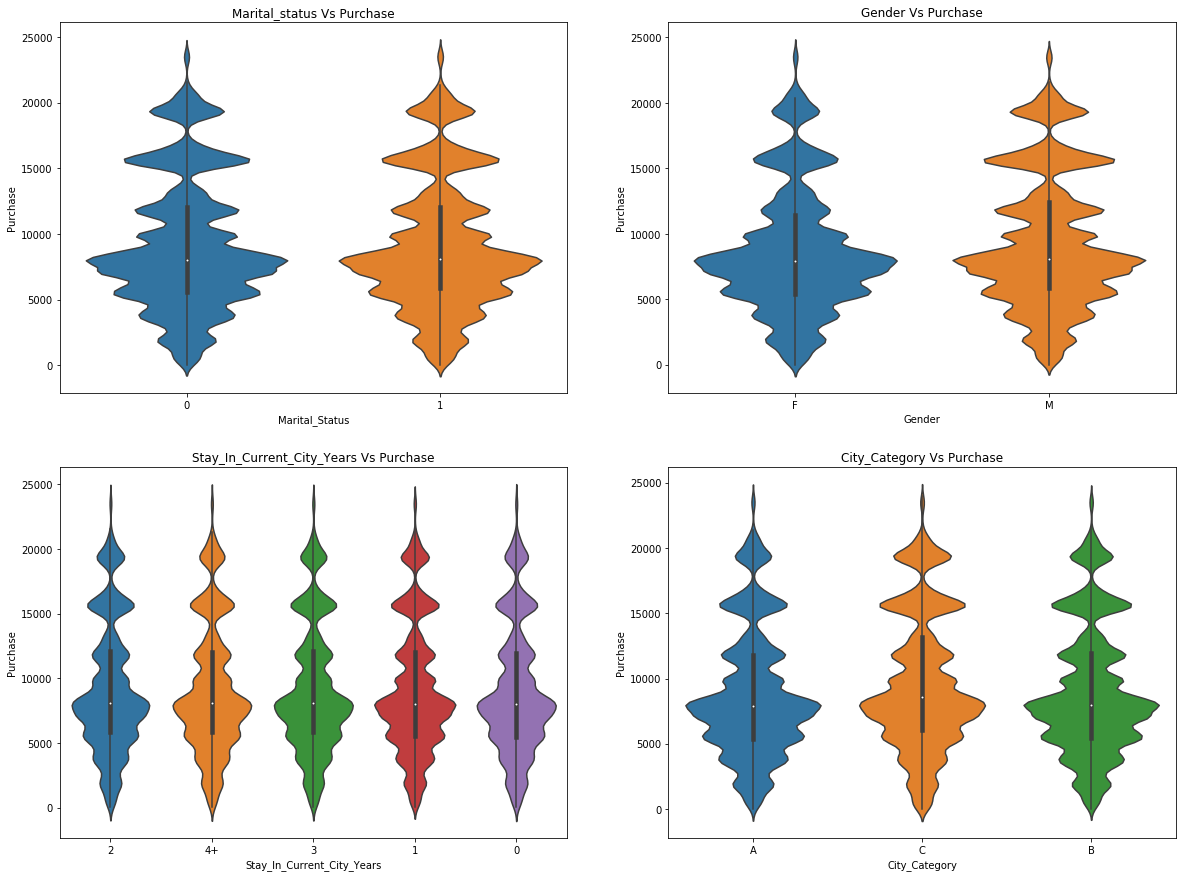

In [47]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.violinplot("Marital_Status","Purchase",split=True, data=train,ax=ax[0,0])
ax[0,0].set_title('Marital_status Vs Purchase')
sns.violinplot("Gender","Purchase",split=True, data=train,ax=ax[0,1])
ax[0,1].set_title('Gender Vs Purchase')
sns.violinplot("Stay_In_Current_City_Years","Purchase",split=True, data=train,ax=ax[1,0])
ax[1,0].set_title('Stay_In_Current_City_Years Vs Purchase')
sns.violinplot("City_Category","Purchase",split=True, data=train,ax=ax[1,1])
ax[1,1].set_title('City_Category Vs Purchase')
plt.show()

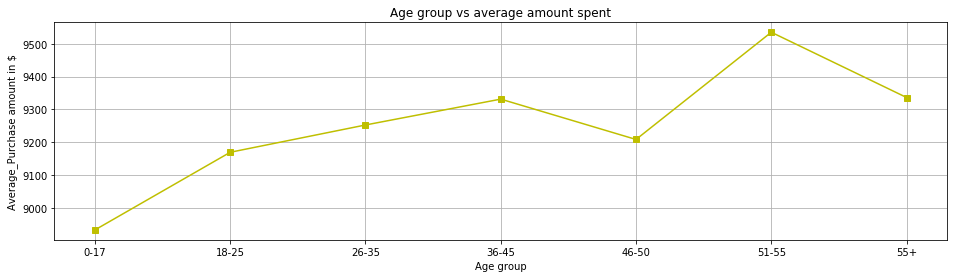

In [48]:
data = train.groupby('Age')['Purchase'].mean()
data  = pd.DataFrame({'Age':data.index, 'Average purchase':data.values})
plt.figure(figsize = (16,4))
plt.plot('Age','Average purchase','ys-',data = data);
plt.grid();
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');